In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "College plots"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = pd.read_csv('top_colleges_2022.csv')
data.head(3)

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,"A leading global research university, MIT attr...",1,Massachusetts Institute of Technology,MA,12195,Urban,173700.0,-71.093539,42.359006,http://web.mit.edu,...,1861.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,3,12195,4582,35299332.0,75.0,60.0
1,Stanford University sits just outside of Palo ...,2,Stanford University,CA,20961,Suburban,173500.0,-122.168924,37.431370,http://www.stanford.edu,...,1891.0,CA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,20961,8464,51328461.0,70.0,55.0
2,One of the top public universities in the coun...,2,"University of California, Berkeley",CA,45878,Urban,154500.0,-122.258393,37.869236,http://www.berkeley.edu,...,1868.0,CA,Public,Doctoral Universities: Very High Research Acti...,19,45878,33208,64495611.0,63.0,53.0


In [4]:
data.describe()

,rank,studentPopulation,medianBaseSalary,longitude,latitude,yearFounded,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
count,498.000000,498.000000,491.000000,458.000000,458.000000,451.000000,498.000000,498.000000,498.000000,4.950000e+02,495.000000,495.000000
mean,249.485944,16073.983936,116382.077393,-89.244965,39.082492,1879.944568,14.120482,16073.983936,12075.550201,2.491186e+07,86.202020,80.939394
std,143.899350,16284.865007,17161.769465,16.590913,4.481500,50.805940,5.203074,16284.865007,12628.161452,1.936898e+07,14.473891,18.382584
min,1.000000,421.000000,77300.000000,-157.820047,21.299373,1636.000000,3.000000,421.000000,421.000000,2.307030e+05,40.000000,31.000000
25%,125.250000,3112.500000,104300.000000,-96.924510,36.105500,1851.000000,10.000000,3112.500000,2613.750000,1.219794e+07,78.000000,67.000000
50%,249.500000,9850.000000,112800.000000,-84.294223,40.195954,1878.000000,13.500000,9850.000000,6844.500000,1.904380e+07,92.000000,88.000000
75%,373.750000,24363.000000,125000.000000,-75.515681,42.210113,1908.500000,17.000000,24363.000000,18655.250000,3.218453e+07,98.000000,97.000000
max,498.000000,102826.000000,173700.000000,-69.659599,48.752350,2013.000000,49.000000,102826.000000,84202.000000,1.575583e+08,100.000000,100.000000


it looks like there are missing values in `medianBaseSalary`, `longitude`, `latitude`, `yearFounded` and about 3 missing for each Grant/financial aid columns. We will graph these missing values later with missingno library

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   description              498 non-null    object 
 1   rank                     498 non-null    int64  
 2   organizationName         498 non-null    object 
 3   state                    498 non-null    object 
 4   studentPopulation        498 non-null    int64  
 5   campusSetting            498 non-null    object 
 6   medianBaseSalary         491 non-null    float64
 7   longitude                458 non-null    float64
 8   latitude                 458 non-null    float64
 9   website                  477 non-null    object 
 10  phoneNumber              428 non-null    object 
 11  city                     498 non-null    object 
 12  country                  498 non-null    object 
 13  state.1                  498 non-null    object 
 14  region                   4

We are missing some longitudes and latitudes for some colleges so we will just input them using geopy

In [6]:
from geopy.geocoders import ArcGIS
no_long_lat = np.where(data['longitude'].isnull())
no_long_lat = np.ravel(no_long_lat)
fill_data = data.iloc[no_long_lat].copy()
gn = ArcGIS()
print('starting search')
for indx, name in enumerate(fill_data['organizationName']):
    location = gn.geocode(name)
    fill_data.loc[no_long_lat[indx], 'longitude'] = location.longitude
    fill_data.loc[no_long_lat[indx], 'latitude'] = location.latitude

starting search


In [7]:
for indx in range(len(no_long_lat)):
    data.loc[no_long_lat[indx], 'longitude'] = fill_data.loc[no_long_lat[indx], 'longitude']
    data.loc[no_long_lat[indx], 'latitude'] = fill_data.loc[no_long_lat[indx], 'latitude']

In [8]:
data.nunique()

description                498
rank                       491
organizationName           498
state                       51
studentPopulation          492
campusSetting                3
medianBaseSalary           324
longitude                  495
latitude                   495
website                    477
phoneNumber                428
city                       374
country                      1
state.1                     51
region                       4
yearFounded                175
stateCode                   51
collegeType                  2
carnegieClassification      12
studentFacultyRatio         29
totalStudentPop            492
undergradPop               489
totalGrantAid              495
percentOfStudentsFinAid     56
percentOfStudentsGrant      67
dtype: int64

looking off the bat we see that all colleges are in the US so there is no need for that column. We will drop is later on. it looks like that there is also only 2 types of college, 4 regions, and 3 types of campus settings. It also looks like there 3 state columns we will examine there importance together

In [9]:
type_region_and_setting = data[['collegeType', 'region', 'campusSetting']]
for col in type_region_and_setting:
    print(type_region_and_setting[col].unique())

['Private not-for-profit' 'Public']
['Northeast' 'West' 'South' 'Midwest' nan]
['Urban' 'Suburban' 'Rural']


In [10]:
region = data['region']
print(region.value_counts())
print(region.value_counts().sum())
print(np.where(data['region'].isnull()))
len(data[pd.isnull(data['region'])])
data[pd.isnull(data['region'])].head(3)

Northeast    181
West         105
South        104
Midwest       99
Name: region, dtype: int64
489
(array([ 17,  25,  40,  81, 147, 221, 230, 251, 481], dtype=int64),)


,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
17,Johns Hopkins University is one of the nation’...,18,Johns Hopkins University,MD,34250,Urban,138700.0,-76.609604,39.290555,http://www.jhu.edu,...,1876.0,NaN,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,34250,8394,41160533.0,65.0,57.0
25,The University of Florida is a large public re...,26,University of Florida,FL,58857,Urban,117300.0,-82.323184,29.651950,http://www.ufl.edu,...,1853.0,NaN,Public,Doctoral Universities: Very High Research Acti...,17,58857,37975,69127340.0,91.0,89.0
40,"One of the oldest colleges in the country, Wil...",41,William & Mary,VA,9785,Suburban,128700.0,-76.709724,37.275609,http://www.wm.edu,...,1903.0,NaN,Public,Doctoral Universities: High Research Activity,11,9785,6760,13593864.0,54.0,41.0


missing region do still have longitude and latitude so we may be able to use that as a way to mark there region to the next closest school to them. They also all seem to have a missing state code but still have their state named. We may be able to drop stateCode completely if this is the case for simplicity

In [11]:
import plotly.express as px
fig = px.scatter_geo(data, lat='latitude', lon='longitude',
                     color='rank', hover_name='state',size='studentPopulation',
                     )
fig.update_layout(
    title='Colleges in the USA colored by rank',
    geo_scope='usa'
)
save_fig('Colleges colored by ranked and sized by student pop')
fig.show()

<Figure size 640x480 with 0 Axes>

looking at the map we see that most colleges ranked 100 or above can be found near the coastal states (Except for hawaii) with a few  in the mid-eastern part of the country. Using the student population to determine the size of each college it also looks like the bigger colleges are also found in the coast

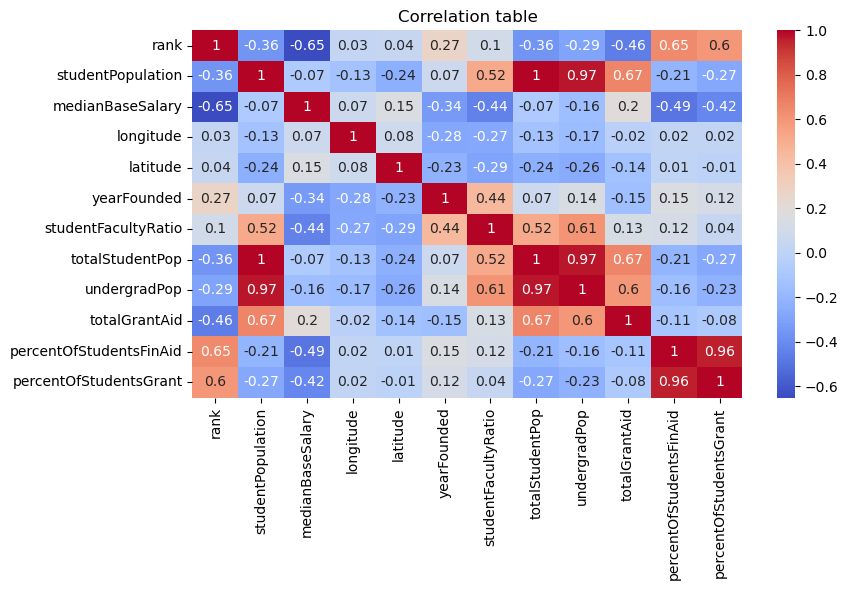

In [12]:
corr = data.corr().round(2)
plt.figure(figsize=(9,6))
plt.title('Correlation table')
sns.heatmap(corr, annot=True, cmap='coolwarm')
save_fig('initial correlation table')
plt.show()

it looks like `totalStudentPop` and `studentPopulation` have the exact same entries of data. as well as rank have a positive correlation between student financial aid and grants, in this case meaning the more financial aid the student pop gets the lower the rank. There is a negative correlation with `medianBaseSalary` meaning higher paid staff belong to higher ranked schools. We do need to do some scaling but it also seems like location and latitude does not effect the overall rank of the school

In [25]:
data.loc[:, ['state', 'state.1', 'stateCode']]
data.loc[data['state'] != data['stateCode'],['state', 'stateCode']] # use state instead of stateCode

,state,stateCode
17,MD,NaN
25,FL,NaN
40,VA,NaN
81,VA,NaN
147,OK,NaN
221,NE,NaN
230,MS,NaN
251,NC,NaN
481,NC,NaN


<AxesSubplot:>

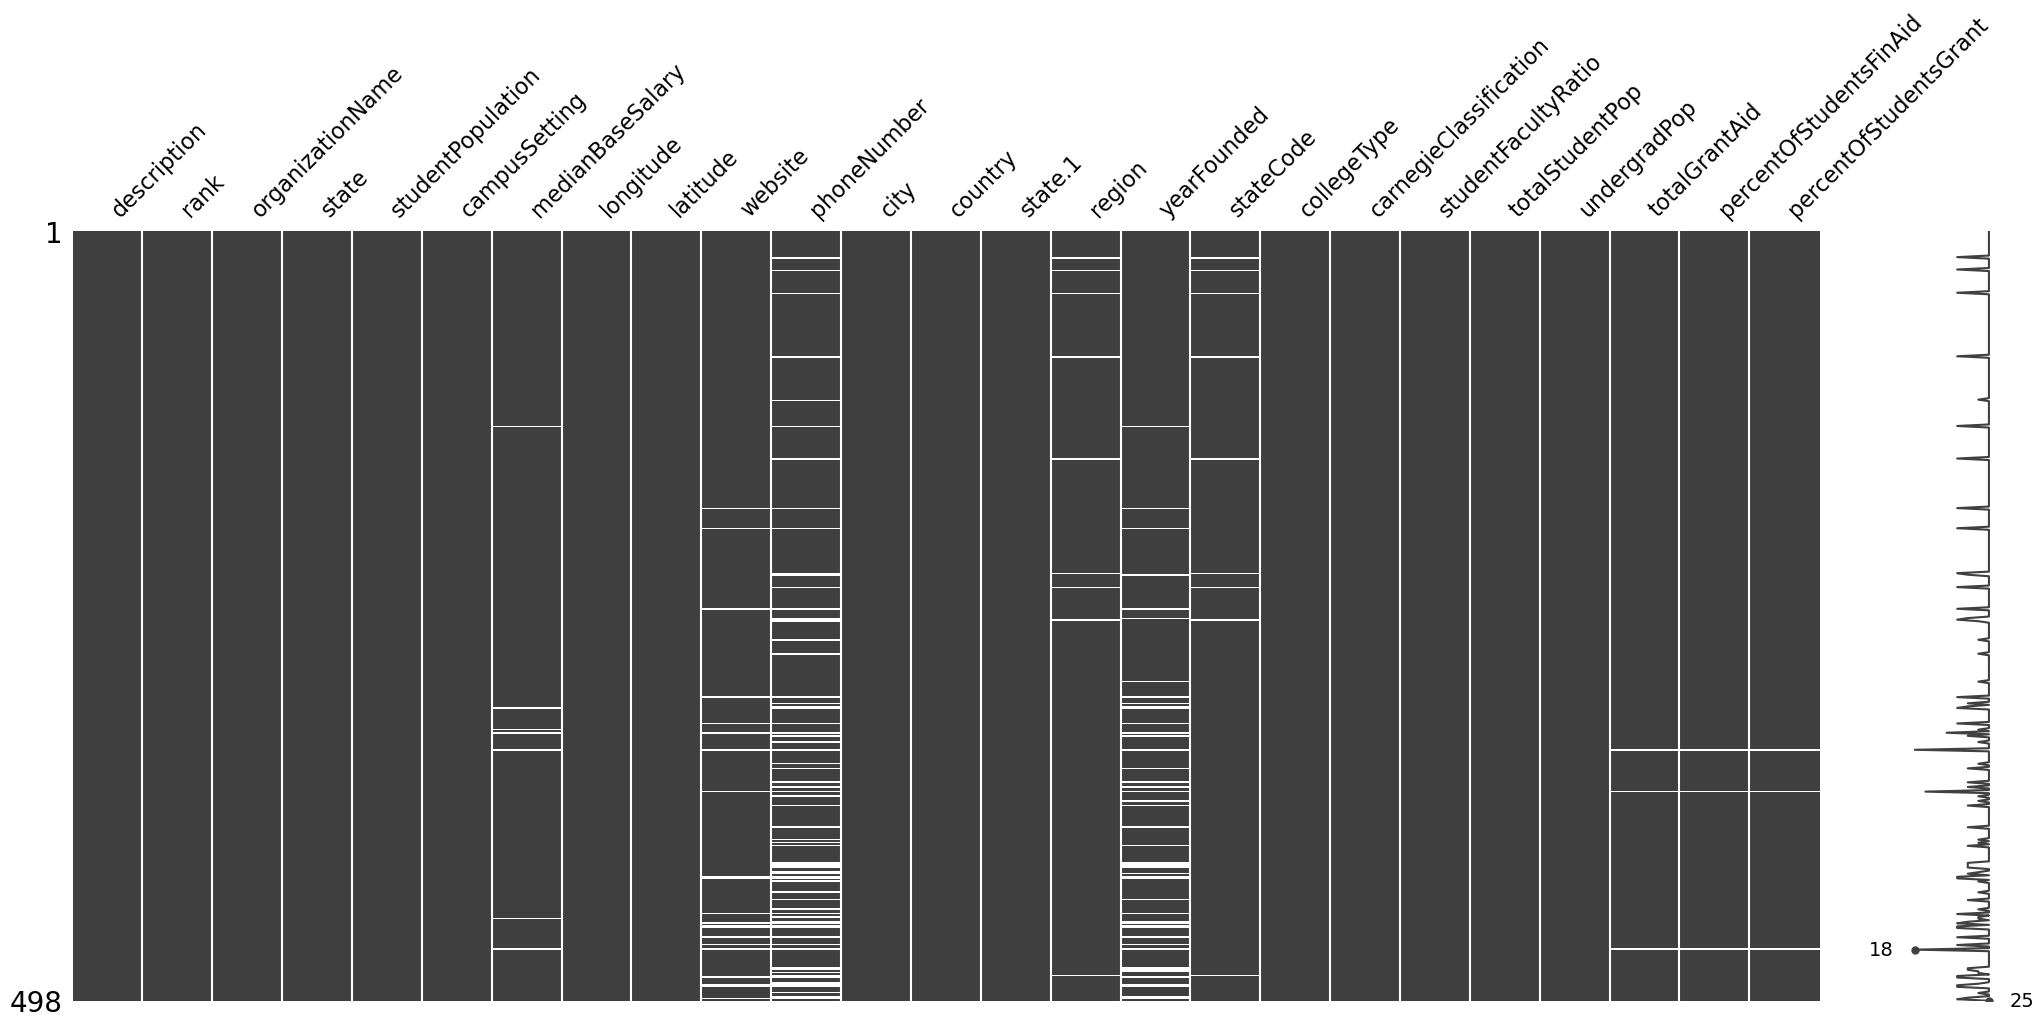

In [27]:
# Check for any more missing values that are of importance
import missingno
missingno.matrix(data)

In [43]:
no_region = np.where(data['region'].isna())
no_region = data.iloc[no_region]
no_region.iloc[:, 10:20].head(3)
print(len(no_region))
data['region'].value_counts()

9


Northeast    181
West         105
South        104
Midwest       99
Name: region, dtype: int64

for the sake of simplicity since the number of missing regions is so small we will just fill it in with the most frequent region